# Assignment 03
## In this assignment we will reveiw OLS, Ridge, and Lasso regression modeling.
       
    Dataset 1. solid waste genration data ('waste.csv')
    Dataset 2. neighborhood characteristics data ('features.csv')
    
__Please submit a python script and markdown using Jupyter notebook (.ipynb file) with your submission. File name should be "Lastname_Firstname_assignment04.ipynb" and submit to canvas. Also provide step-by-step code for partial credit(s) and do not forget to run all your code before saving.__

* Please do not share works publicly on GitHub or other places until the deadline.
* Some part of coding can be identical if you work with classmates but annotation/comments should be individually written.
* If you have any concerns or struggles, do not hesitate to send an email (b.hong@columbia.edu). 

# 1. Answer the questions about the properties of OLS/Lasso/Ridge:

a) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?

b) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square (OLS) regression?

c) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

d) What metrics you would use to evaluate regression model performance?

a) Lasso is the regresion that will completely eliminate coefficients for irrelevant regressors.\

b) A lambda of 0 sets the Lasso and Ridge regressions equal to the OLS regression. 

c) The validation dataset allows us to optimize lambda in a Lasso or Ridge regression. 

d) The relevant metrics are the set R-squared scores on both the training and test datasets as well as the mean square error of each dataset. The optimal model will have high R-squared scores and low MSEs, with as little variation between training and test metrics as possible. 

# 2. Create a dataset for regression modeling
We will train regerssion models to predict paper generation per capita across neighborhoods based on urban characteristics. 
### (1) Load two following datasets, (2) merge two datasets, (3) drop rows with null, and (4) shuffle dataset
    Dataset 1. solid waste genration data ('waste.csv')
    Dataset 2. neighborhood characteristics data ('features.csv')
    
    Hint1. To drop rows with NaN, use .dropna() function
    Hint2. To shuffle your merged dataset, use .sample(frac=1).reset_index(drop=True)

In [69]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from math import sqrt
from regressors import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
waste = pd.read_csv("../data/waste.csv")
features = pd.read_csv("../data/features.csv")

waste = waste.dropna()
features = features.dropna()

print(waste.columns.tolist())
print(features.columns.tolist())

df = pd.merge(waste, features, on = "subSection", how = "left")
df = df.sample(frac=1).reset_index(drop=True)
df = df.iloc[:, 1:]

print(len(df))
df.head()

['subSection', 'avgWeekRefuse', 'avgWeekPaper', 'avgWeekMGP']
['pct_pop_age_lt_18', 'pct_pop_age_18_65', 'pct_pop_age_gt_65', 'pct_pop_white', 'pct_pop_black', 'pct_pop_other', 'pct_hh_wchild', 'avg_hh_size', 'pct_pop_lt_college', 'pct_pop_dropout', 'pct_pop_unemp', 'pct_hh_income_lt_20k', 'pct_hh_income_20_75k', 'pct_hh_income_gt_75k', 'pct_hh_w_pa', 'pct_hu_owned', 'subSection', 'num_UnitsRes', 'pct_resUnits', 'tot_ResArea', 'tot_lotArea', 'pop', 'pop_by_unitsRes', 'pop_by_resArea', 'pop_by_lotArea']
601


,avgWeekRefuse,avgWeekPaper,avgWeekMGP,pct_pop_age_lt_18,pct_pop_age_18_65,pct_pop_age_gt_65,pct_pop_white,pct_pop_black,pct_pop_other,pct_hh_wchild,...,pct_hh_w_pa,pct_hu_owned,num_UnitsRes,pct_resUnits,tot_ResArea,tot_lotArea,pop,pop_by_unitsRes,pop_by_resArea,pop_by_lotArea
0,129.236089,6.371386,9.725396,0.271979,0.648642,0.079379,0.150526,0.364032,0.439254,0.434549,...,0.068337,0.085401,6904,0.938426,6107523,3146000,20539,2.974942,0.003363,0.006529
1,61.599802,10.001089,7.447673,0.193736,0.640051,0.166212,0.661849,0.094950,0.209983,0.283046,...,0.026681,0.393264,2932,0.563846,4078332,21949370,7351,2.507162,0.001802,0.000335
2,47.965000,3.902871,4.825198,0.250802,0.635239,0.113959,0.175185,0.553875,0.239778,0.424803,...,0.086973,0.270677,4104,0.973897,3959837,4052009,9220,2.246589,0.002328,0.002275
3,99.589109,9.630743,10.850248,0.217339,0.656716,0.125945,0.428823,0.052371,0.487302,0.383234,...,0.027885,0.311301,4324,0.929693,4370636,7596269,16157,3.736586,0.003697,0.002127
4,63.661634,9.947228,7.805743,0.201301,0.621745,0.176954,0.926349,0.001363,0.065667,0.334662,...,0.016003,0.855000,2919,0.979530,3627117,12723728,7665,2.625899,0.002113,0.000602


### (5) Define target variable ($y$) and predictors ($X$) and split data into training and test data
    Since we are predicting the paper generation per capita, 'avgWeekPaper' would be your target column.
    Please use all neighborhood features at this point.

In [141]:
X = df.iloc[:, df.columns != "avgWeekPaper"]
y = df.iloc[:, df.columns == "avgWeekPaper"]

X.head()

,avgWeekRefuse,avgWeekMGP,pct_pop_age_lt_18,pct_pop_age_18_65,pct_pop_age_gt_65,pct_pop_white,pct_pop_black,pct_pop_other,pct_hh_wchild,avg_hh_size,...,pct_hh_w_pa,pct_hu_owned,num_UnitsRes,pct_resUnits,tot_ResArea,tot_lotArea,pop,pop_by_unitsRes,pop_by_resArea,pop_by_lotArea
0,129.236089,9.725396,0.271979,0.648642,0.079379,0.150526,0.364032,0.439254,0.434549,3.198600,...,0.068337,0.085401,6904,0.938426,6107523,3146000,20539,2.974942,0.003363,0.006529
1,61.599802,7.447673,0.193736,0.640051,0.166212,0.661849,0.094950,0.209983,0.283046,2.492400,...,0.026681,0.393264,2932,0.563846,4078332,21949370,7351,2.507162,0.001802,0.000335
2,47.965000,4.825198,0.250802,0.635239,0.113959,0.175185,0.553875,0.239778,0.424803,2.983469,...,0.086973,0.270677,4104,0.973897,3959837,4052009,9220,2.246589,0.002328,0.002275
3,99.589109,10.850248,0.217339,0.656716,0.125945,0.428823,0.052371,0.487302,0.383234,3.203750,...,0.027885,0.311301,4324,0.929693,4370636,7596269,16157,3.736586,0.003697,0.002127
4,63.661634,7.805743,0.201301,0.621745,0.176954,0.926349,0.001363,0.065667,0.334662,2.850541,...,0.016003,0.855000,2919,0.979530,3627117,12723728,7665,2.625899,0.002113,0.000602


# 3. Create OLS model:
### (1) Show train and test results 
    Please use R-squared and Mean Squared Error (MSE) to evaluate your model

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=0)
print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

lr = LinearRegression().fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
print ("Training set score: %.2f"% lr.score(X_train, y_train))
print ("Test set score: %.2f"% lr.score(X_test, y_test))
print('Mean squared error (train set): %.2f'% mean_squared_error(y_train, y_pred_train))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, y_pred_test))

Train sample (X): 450
Train sample (y): 450
Test sample (X): 151
Test sample (y): 151
Training set score: 0.88
Test set score: 0.81
Mean squared error (train set): 3.33
Mean squared error (test set): 3.98


### (2) Show regression coefficients and interpret your result

In [143]:
print ("List of predictors:", df.columns.tolist()[:-1])
print ("List of regression coefficients:", lr.coef_)
print ("p-values of predictors:", stats.coef_pval(lr, X_train, y_train))
print ("Constant (intercept):",lr.intercept_)

result_ols = pd.DataFrame(columns=['Features', 'Coef', 'p-value'])
result_ols['Features'] = df.columns.tolist()[:-1]
result_ols['Coef'] = lr.coef_[0]
result_ols['p-value'] = stats.coef_pval(lr, X_train, y_train)[1:]
result_ols.round(3)

List of predictors: ['avgWeekRefuse', 'avgWeekPaper', 'avgWeekMGP', 'pct_pop_age_lt_18', 'pct_pop_age_18_65', 'pct_pop_age_gt_65', 'pct_pop_white', 'pct_pop_black', 'pct_pop_other', 'pct_hh_wchild', 'avg_hh_size', 'pct_pop_lt_college', 'pct_pop_dropout', 'pct_pop_unemp', 'pct_hh_income_lt_20k', 'pct_hh_income_20_75k', 'pct_hh_income_gt_75k', 'pct_hh_w_pa', 'pct_hu_owned', 'num_UnitsRes', 'pct_resUnits', 'tot_ResArea', 'tot_lotArea', 'pop', 'pop_by_unitsRes', 'pop_by_resArea']
List of regression coefficients: [[-5.50402522e-05  9.28682224e-01  9.02499182e+00 -5.08970267e+00
  -3.93430054e+00  2.74069686e+01  2.49418188e+01  2.65330873e+01
  -1.04954640e+01  2.14596027e+00 -7.24863542e+00  3.99004505e+00
  -7.70679385e+00  1.19553021e+00  1.73726107e+00 -2.93279132e+00
  -5.39225356e+00  2.70292703e+00 -4.92470264e-04 -1.66240293e+00
   1.06289044e-06  7.25268765e-09 -2.45682209e-04 -1.05160816e+00
   5.51174163e+02  6.14310538e+02]]
p-values of predictors: [9.99993580e-01 9.97548520e-01

,Features,Coef,p-value
0,avgWeekRefuse,-0.000,0.998
1,avgWeekPaper,0.929,0.000
2,avgWeekMGP,9.025,1.000
3,pct_pop_age_lt_18,-5.090,1.000
4,pct_pop_age_18_65,-3.934,1.000
5,pct_pop_age_gt_65,27.407,0.000
6,pct_pop_white,24.942,0.000
7,pct_pop_black,26.533,0.000
8,pct_pop_other,-10.495,0.022
9,pct_hh_wchild,2.146,0.000


Based on these results, there are a lot of variables for which the correlation is not statistically significant (eg. avgWeekMGP, pct_pop_age_lt_18, pct_pop_unemp. However, there are also a lot of variables with a p vale of < 0.001, which is highly statistically significant. 

# 4. Create Ridge model:
### (1) Create a defualt model and show train and test resutls 
    Please use R-squared and Mean Squared Error (MSE) to evaluate your model

In [144]:
ridge = Ridge(random_state=0).fit(X_train, y_train)
print ("Training set score: %.3f"% ridge.score(X_train, y_train))
print ("Test set score: %.3f"% ridge.score(X_test, y_test))

print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, ridge.predict(X_train)))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, ridge.predict(X_test)))

Training set score: 0.850
Test set score: 0.774
Mean squared error (training set): 4.00
Mean squared error (test set): 4.02


### (2) Find an optimized lambda ($\lambda$) between 0 ~ 10, using for loops
    Use range(0,10,200)

In [145]:
lambdas = np.linspace(0,10,200)

list_train = [] 
list_test = []
list_gap = [] 

for alpha in lambdas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train) 
    
    list_train.append(ridge.score(X_train, y_train))
    list_test.append(ridge.score(X_test, y_test))
    list_gap.append(ridge.score(X_train, y_train) - ridge.score(X_test, y_test))

print ("The list of R2 values (training set):", list_train[:3])
print ("The list of R2 values (test set):", list_test[:3])
print ("The list of gap between two values:", list_gap[:3])

p = list_gap.index(min(list_gap)) 
print ("Optimized lambda (alpha) =", round(lambdas[p],3))
print ("R-squqared value (train) of the optimized ridge model = ", round(list_train[p],3))
print ("R-squqared value (test) of the optimized ridge model = ", round(list_test[p],3))

The list of R2 values (training set): [0.875283860663204, 0.8559677448581504, 0.854995346962401]
The list of R2 values (test set): [0.8104281656790213, 0.7829379169079871, 0.7803316956497445]
The list of gap between two values: [0.06485569498418264, 0.07302982795016333, 0.07466365131265651]
Optimized lambda (alpha) = 0.0
R-squqared value (train) of the optimized ridge model =  0.875
R-squqared value (test) of the optimized ridge model =  0.81


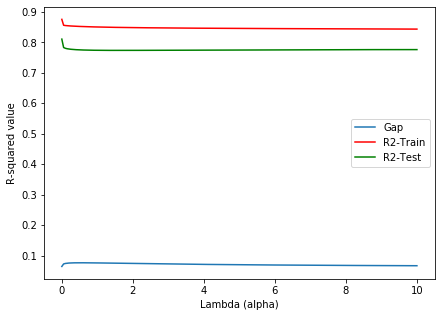

In [146]:
plt.figure(figsize=(7,5))

plt.plot(lambdas, list_gap, label='Gap')
plt.plot(lambdas, list_train, c='Red', label='R2-Train') 
plt.plot(lambdas, list_test, c='Green', label='R2-Test')

plt.xlabel("Lambda (alpha)")
plt.ylabel("R-squared value")

plt.legend()

### (3) Using the optimized lambda ($\lambda$), train your Ridge model and show train/test results

In [148]:
final_ridge = Ridge(alpha=lambdas[p]).fit(X_train, y_train)
y_pred_train = final_ridge.predict(X_train)

print ("Training set score: %.2f"% final_ridge.score(X_train, y_train))
print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, y_pred_train))

y_pred_test = final_ridge.predict(X_test)

print ("Test set score: %.2f"% final_ridge.score(X_test, y_test))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, y_pred_test))

Training set score: 0.88
Mean squared error (training set): 3.33
Test set score: 0.81
Mean squared error (test set): 3.37


# 5. Create Lasso model:
### (1) Create a default model and show train and test resutls
    Please use R-squared and Mean Squared Error (MSE) to evaluate your model

In [149]:
lasso = Lasso(random_state=0).fit(X_train, y_train)
print ("Training set score: %.3f"% lasso.score(X_train, y_train))
print ("Test set score: %.3f"% lasso.score(X_test, y_test))
print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, lasso.predict(X_train)))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, lasso.predict(X_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0)) 

Training set score: 0.816
Test set score: 0.737
Mean squared error (training set): 4.92
Mean squared error (test set): 4.68
Number of features used: 6


### (2) Find an optimize lambda ($\lambda$) between 0-1, using for loops.
    Use range(0,1,200)

In [153]:
lambdas = np.linspace(0,1,200)

list_train = [] 
list_test = [] 
list_gap = [] 
list_num_features = []

for alpha in lambdas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train) 
    
    list_train.append(lasso.score(X_train, y_train))
    list_test.append(lasso.score(X_test, y_test))
    list_gap.append(lasso.score(X_train, y_train) - lasso.score(X_test, y_test))
    list_num_features.append(np.sum(lasso.coef_ != 0))

print ("The list of R2 values (training set):", list_train[:3])
print ("The list of R2 values (test set):", list_test[:3]) 
print ("The list of gap between two values:", list_gap[:3])
print ("The list of #of used features:", list_num_features[:3])

p = list_gap.index(min(list_gap)) 
print ("Optimized lambda (alpha) =", round(lambdas[p],3))
print ("R-squqared value (train) of the optimized ridge model = ", round(list_train[p],3))
print ("R-squqared value (test) of the optimized ridge model = ", round(list_test[p],3))
print ("The number of features used =", list_num_features[p])

The list of R2 values (training set): [0.8753200824997628, 0.8495319737579271, 0.8475301180543947]
The list of R2 values (test set): [0.8101688919572051, 0.772526009367928, 0.7758623335138294]
The list of gap between two values: [0.06515119054255769, 0.07700596438999907, 0.07166778454056533]
The list of #of used features: [26, 13, 11]
Optimized lambda (alpha) = 0.05
R-squqared value (train) of the optimized ridge model =  0.838
R-squqared value (test) of the optimized ridge model =  0.776
The number of features used = 8


### (3) Using the optimized lambda ($\lambda$), train your Lasso model and show train/test results

In [154]:
final_lasso = Lasso(alpha=lambdas[p]).fit(X_train, y_train)
y_pred_train = final_lasso.predict(X_train)

print ("Training set score: %.2f"% final_lasso.score(X_train, y_train))
print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, y_pred_train))

y_pred_test = final_lasso.predict(X_test)

print ("Test set score: %.2f"% final_lasso.score(X_test, y_test))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, y_pred_test))
print ("The number of features used =",np.sum(final_lasso.coef_ != 0))

Training set score: 0.84
Mean squared error (training set): 4.33
Test set score: 0.78
Mean squared error (test set): 3.98
The number of features used = 8


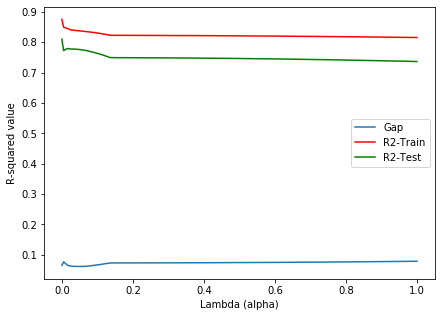

In [155]:
plt.figure(figsize=(7,5))

plt.plot(lambdas, list_gap, label='Gap')
plt.plot(lambdas, list_train, c='Red', label='R2-Train') 
plt.plot(lambdas, list_test, c='Green', label='R2-Test')

plt.xlabel("Lambda (alpha)")
plt.ylabel("R-squared value")

plt.legend()

### (4) How many features (predictors) are used for the optimized Lasso modeling? and which predictors are in? Describe your findings.

In [156]:
result_lasso = pd.DataFrame(columns=['Features', 'Coef'])
result_lasso['Features'] = df.columns.tolist()[:-1]
result_lasso['Coef'] = final_lasso.coef_

print(final_lasso.coef_)

result_lasso.round(10)

[ 6.04624493e-03  9.39140637e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  4.98826465e-01 -1.73729567e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -3.90526411e-04  0.00000000e+00
  1.19880883e-06 -4.39091843e-08 -3.27209692e-04 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00]


,Features,Coef
0,avgWeekRefuse,6.046245e-03
1,avgWeekPaper,9.391406e-01
2,avgWeekMGP,0.000000e+00
3,pct_pop_age_lt_18,-0.000000e+00
4,pct_pop_age_18_65,0.000000e+00
5,pct_pop_age_gt_65,4.988265e-01
6,pct_pop_white,-1.737296e+00
7,pct_pop_black,0.000000e+00
8,pct_pop_other,-0.000000e+00
9,pct_hh_wchild,0.000000e+00


The Lasso model in this case uses 8 predictors for its optimized model. These predictors are: 

* Average weekly refuse
* Average weekly paper recycled
* % of the population > 65 years old
* % of the population that is white
* % of housing units occupied by the owner
* % of residential units
* Total residential area
* Total lot area

This indicates that these 8 variables are the best predictors of the average weekly paper recyclied in a given area. 